# Lấy dữ liệu 

Về chỉ số:

- chỉ số VN30 (30 mã chứng khoán tốt nhất sàn HOSE - Hồ Chí Minh), 
- chỉ số S&P500 (mã 500 công ty vốn hóa tốt nhất của Mỹ), 
- chỉ số lãi suất trái phiếu chính phủ Mỹ kỳ hạn 10 năm

In [1]:
# %pip install yfinance matplotlib seaborn plotly

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import pandas_datareader as web
import datetime

In [3]:
vn30_july2024 = [
    "ACB.VN",
    "BID.VN",
    "BVH.VN",
    "BCM.VN",
    "CTG.VN",
    "FPT.VN",
    "GAS.VN",
    "GVR.VN",
    "HDB.VN",
    "HPG.VN",
    "MBB.VN",
    "MSN.VN",
    "MWG.VN",
    "PLX.VN",
    "VIB.VN",
    "POW.VN",
    "SAB.VN",
    "SSI.VN",
    "STB.VN",
    "TCB.VN",
    "TPB.VN",
    "VCB.VN",
    "VHM.VN",
    "VIC.VN",
    "VJC.VN",
    "VNM.VN",
    "VPB.VN",
    "VRE.VN",
    "SHB.VN",
    "SSB.VN",
]

print('Tải xuống chỉ số VN30 (danh sách các mã cập nhật tại tháng 7/2024)')
vn30 = yf.download(vn30_july2024, period="max")
print(vn30["Close"]["MBB.VN"].tail())

print('-'*45)

print('Tải xuống chỉ số S&P 500')
sp500 = yf.download(["^GSPC"], period="max")
print(sp500["Close"].tail())

print('-'*45)

# Lấy dữ liệu lãi suất 10 năm của Mỹ từ FRED
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime.now()
print('Tải xuống lãi suất trái phiếu chính phủ Mỹ kỳ hạn 10 năm')
d10y = web.DataReader(['DGS10'], 'fred', start, end)
print(d10y["DGS10"].tail())

Tải xuống chỉ số VN30 (danh sách các mã cập nhật tại tháng 7/2024)


[*********************100%***********************]  30 of 30 completed


Date
2024-08-30 00:00:00+00:00    24850.0
2024-09-04 00:00:00+00:00    24400.0
2024-09-05 00:00:00+00:00    23950.0
2024-09-06 00:00:00+00:00    24000.0
2024-09-09 00:00:00+00:00    23950.0
Name: MBB.VN, dtype: float64
---------------------------------------------
Tải xuống chỉ số S&P 500


[*********************100%***********************]  1 of 1 completed


Date
2024-09-03    5528.930176
2024-09-04    5520.069824
2024-09-05    5503.410156
2024-09-06    5408.419922
2024-09-09    5483.009766
Name: Close, dtype: float64
---------------------------------------------
Tải xuống lãi suất trái phiếu chính phủ Mỹ kỳ hạn 10 năm
DATE
2024-08-30    3.91
2024-09-02     NaN
2024-09-03    3.84
2024-09-04    3.77
2024-09-05    3.73
Name: DGS10, dtype: float64


In [4]:
# Chuẩn hóa lại dữ liệu
vn30.index = pd.to_datetime(vn30.index.tz_convert(None))
sp500.index = pd.to_datetime(sp500.index)
d10y.index = pd.to_datetime(d10y.index)

# Biểu đồ heatmap đánh giá tương quan của các chỉ số

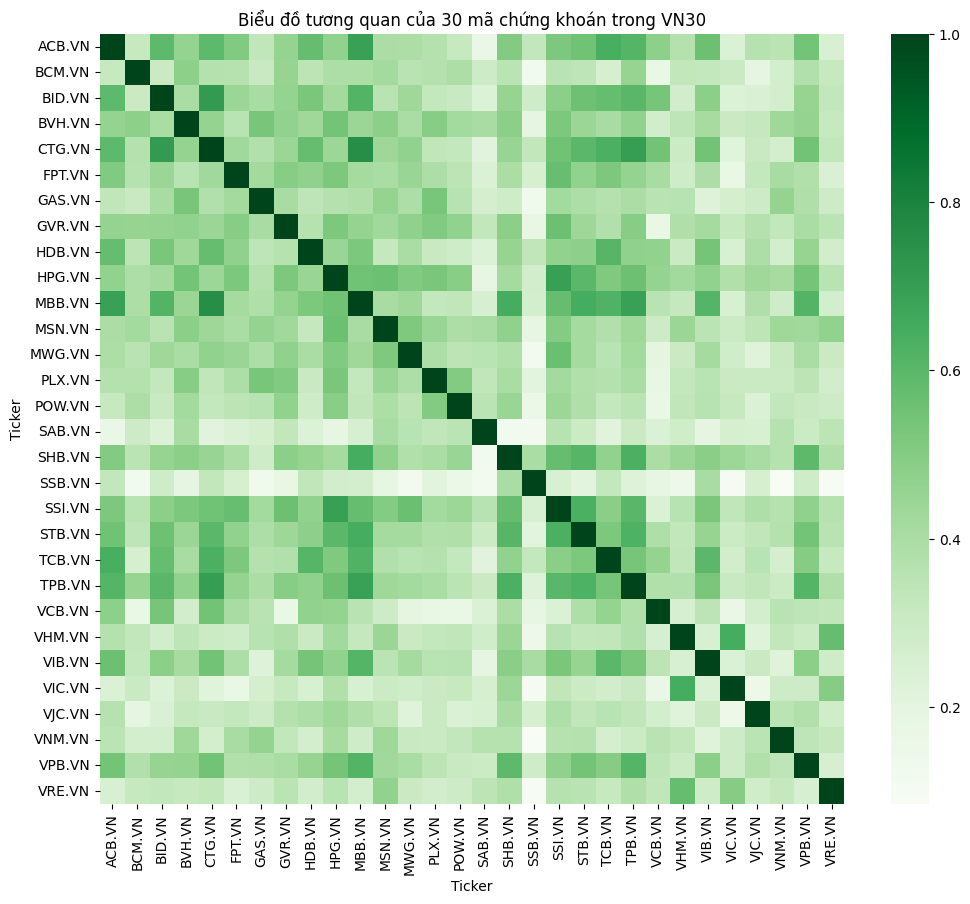

In [5]:
correlation_matrix = vn30["Close"].pct_change(fill_method=None).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='Greens')
plt.title('Biểu đồ tương quan của 30 mã chứng khoán trong VN30')
plt.show()

Nhận xét thấy 30 mã có 1 số mã có quan hệ tương quan khá cao với nhau. Điều này đến từ việc chung nhóm ngành kinh doanh trong 30 mã này điển hình như ngân hàng, xây dựng, ...

Sau đây em sẽ phân tích ảnh hưởng của chỉ số S&P 500 và lãi suất trái phiếu chính phủ Mỹ 10 năm đến chứng khoán Việt Nam qua chỉ số VN30.

Dữ liệu lọc sạch tổng hợp là: 
             VN30_Sum       S&P500  10Y_Treasury_Yield
2024-08-28  1365850.0  5592.180176                3.84
2024-08-29  1368600.0  5591.959961                3.87
2024-08-30  1371950.0  5648.399902                3.91
2024-09-04  1361050.0  5520.069824                3.77
2024-09-05  1352200.0  5503.410156                3.73
Ma trận tương quan: 
                    VN30_Sum    S&P500  10Y_Treasury_Yield
VN30_Sum            1.000000  0.887249            0.176311
S&P500              0.887249  1.000000           -0.051793
10Y_Treasury_Yield  0.176311 -0.051793            1.000000


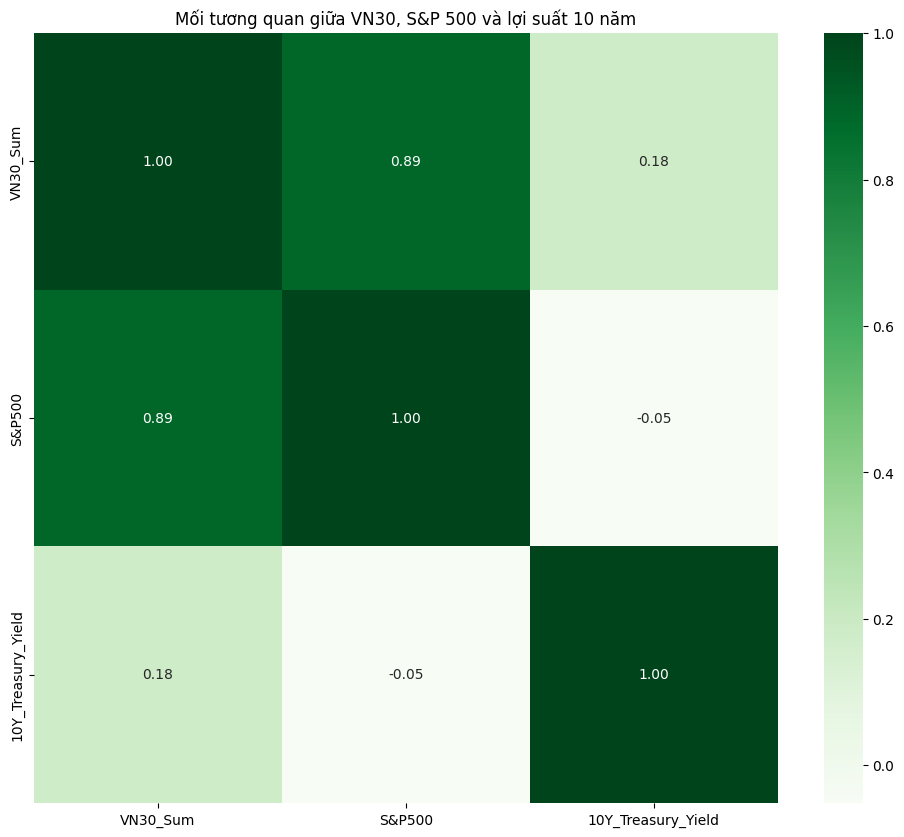

In [6]:
# Tạo dataframe hợp nhất
merged_data = pd.concat([vn30["Close"].sum(axis=1), sp500["Close"], d10y["DGS10"]], axis=1, join="inner")

# Đổi tên cột
merged_data.columns = ['VN30_Sum', 'S&P500', '10Y_Treasury_Yield']

# Xem thử dữ liệu
print(f'Dữ liệu lọc sạch tổng hợp là: \n{merged_data.tail()}')

# Tính ma trận tương quan
correlation_matrix = merged_data.corr()
print(f'Ma trận tương quan: \n{correlation_matrix}')

# Vẽ heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="Greens", fmt=".2f")
plt.title("Mối tương quan giữa VN30, S&P 500 và lợi suất 10 năm")
plt.show()

Như vậy S&P500 dễ ảnh hưởng tới VN30 hơn.

# Một số góc nhìn hay ho khác về VN30

Diễn giải về lý do tăng trưởng của thanh khoản, công ty tiềm năng tăng trưởng dài hạn, ổn định, ... sẽ là các thông tin có giá trị phân tích về sau này.

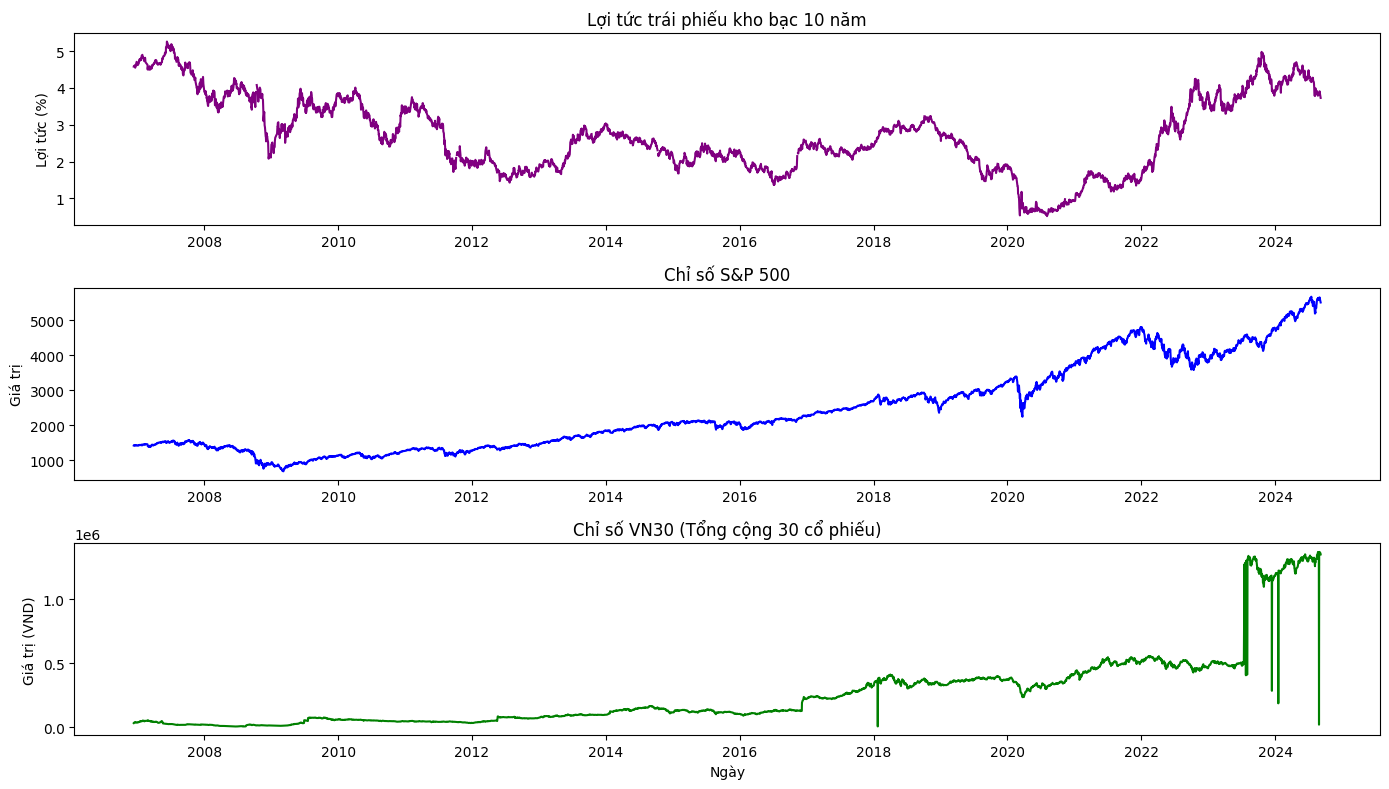

In [7]:
plt.figure(figsize=(14, 8))

plt.subplot(3, 1, 1)
plt.plot(merged_data.index, merged_data['10Y_Treasury_Yield'], color='purple')
plt.title('Lợi tức trái phiếu kho bạc 10 năm')
plt.ylabel('Lợi tức (%)')

plt.subplot(3, 1, 2)
plt.plot(merged_data.index, merged_data['S&P500'], color='blue')
plt.title('Chỉ số S&P 500')
plt.ylabel('Giá trị')

plt.subplot(3, 1, 3)
plt.plot(merged_data.index, merged_data['VN30_Sum'], color='green')
plt.title('Chỉ số VN30 (Tổng cộng 30 cổ phiếu)')
plt.ylabel('Giá trị (VND)')

plt.xlabel('Ngày')
plt.tight_layout()
plt.show()

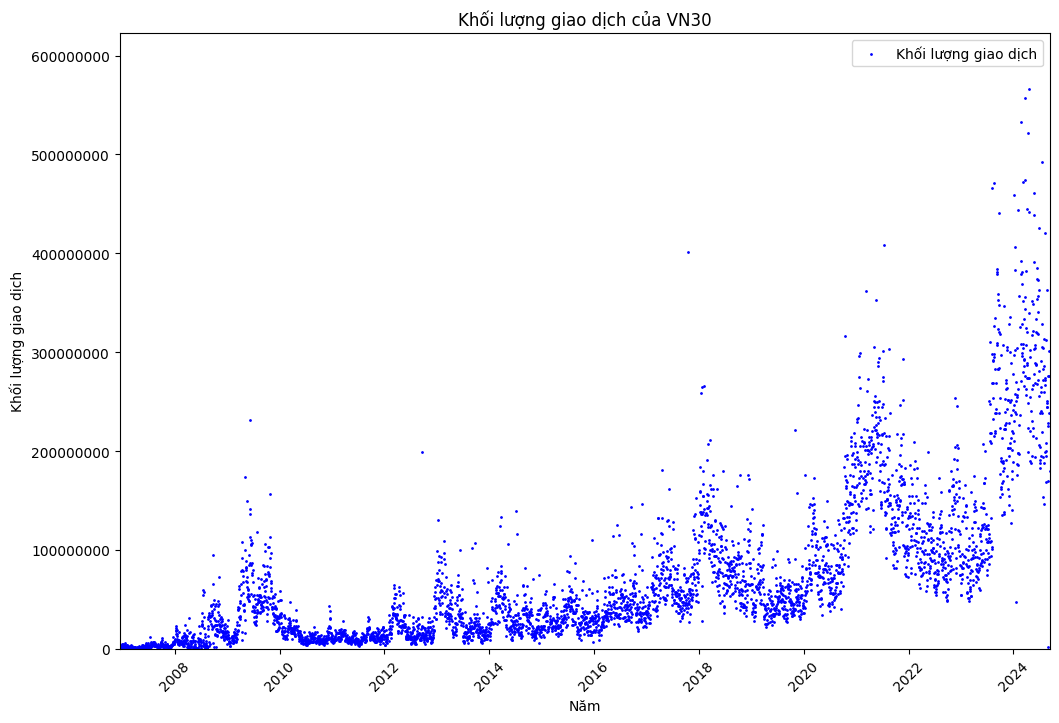

In [8]:
total_volume = vn30['Volume'].sum(axis=1)

plt.figure(figsize=(12, 8))
plt.scatter(total_volume.index, total_volume, color='blue', s=1, marker='o')
plt.title('Khối lượng giao dịch của VN30')
plt.ylabel('Khối lượng giao dịch')
plt.xlabel('Năm')
# plt.grid(True, linestyle='--', alpha=0.5)
plt.xlim(total_volume.index.min(), total_volume.index.max())
plt.ylim(0, total_volume.max() * 1.1)
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.legend(['Khối lượng giao dịch'])
plt.show()

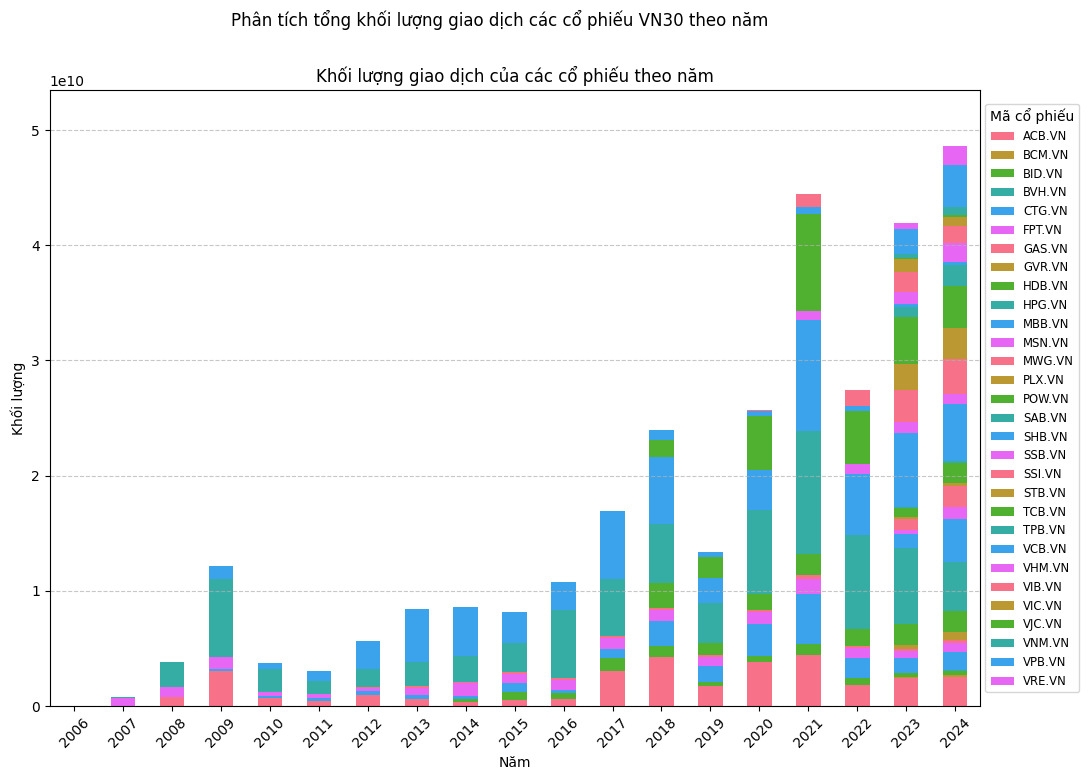

In [9]:
df = vn30

# Đảm bảo cột 'Date' đang ở định dạng datetime
df.index = pd.to_datetime(df.index)

# Lấy các cột liên quan đến Volume
volume_columns = [col for col in df.columns if col[0] == "Volume"]

# Tạo dataframe chỉ chứa các cột Volume
volume_df = df[volume_columns].copy()
volume_df.columns = volume_df.columns.get_level_values(
    "Ticker"
)  # Chuyển đổi MultiIndex cột thành một chỉ mục đơn

# Thêm cột 'Year' vào dataframe
volume_df["Year"] = volume_df.index.year

# Nhóm dữ liệu theo năm và tính tổng khối lượng
pivot_df = volume_df.groupby("Year").sum()

# Vẽ biểu đồ khối lượng của các cổ phiếu theo năm
sns.set_palette("husl")
pivot_df.plot(kind="bar", stacked=True, figsize=(12, 8))
plt.title("Khối lượng giao dịch của các cổ phiếu theo năm") 
plt.xlabel("Năm")  
plt.ylabel("Khối lượng")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, pivot_df.sum(axis=1).max() * 1.1)
plt.xticks(rotation=45)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# plt.ticklabel_format(style='plain', axis='y')
plt.legend(title="Mã cổ phiếu", loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')
plt.suptitle("Phân tích tổng khối lượng giao dịch các cổ phiếu VN30 theo năm")
plt.show()

<Figure size 1200x1000 with 0 Axes>

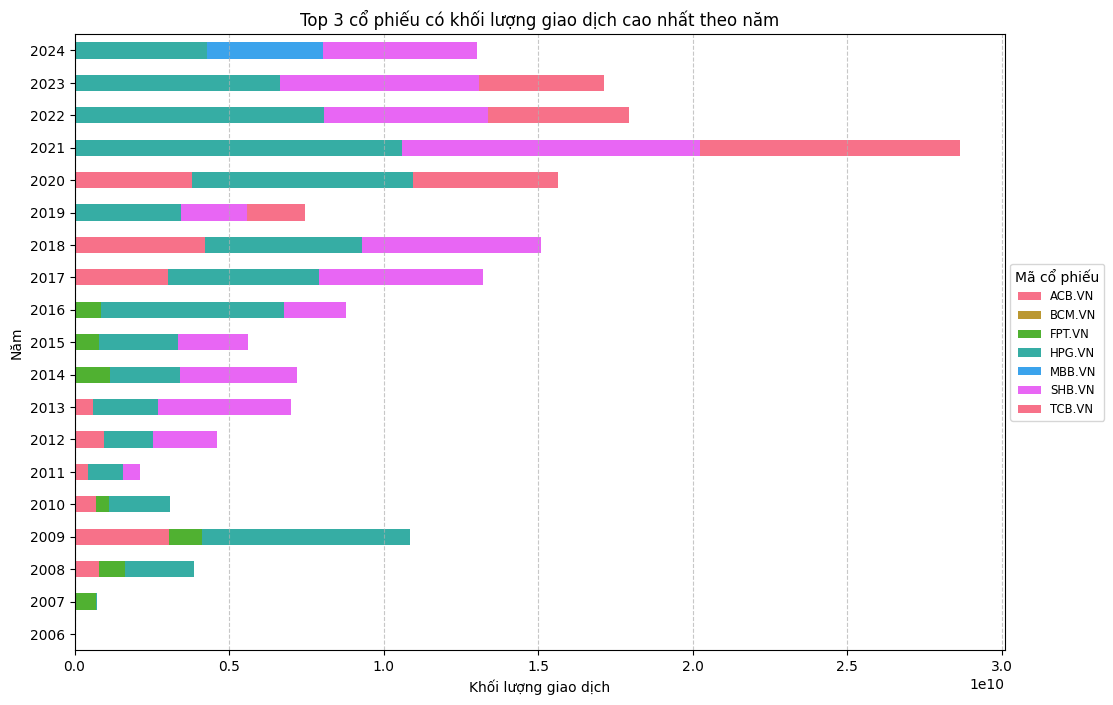

In [10]:
df = vn30

# Đảm bảo cột 'Date' đang ở định dạng datetime
df.index = pd.to_datetime(df.index)

# Lấy các cột liên quan đến Volume
volume_columns = [col for col in df.columns if col[0] == "Volume"]

# Tạo dataframe chỉ chứa các cột Volume
volume_df = df[volume_columns].copy()
volume_df.columns = volume_df.columns.get_level_values(
    "Ticker"
)  # Chuyển đổi MultiIndex cột thành một chỉ mục đơn

# Thêm cột 'Year' vào dataframe
volume_df["Year"] = volume_df.index.year

# Nhóm dữ liệu theo năm và tính tổng khối lượng cho từng mã chứng khoán
annual_volume_df = volume_df.groupby(["Year"]).sum()


# Hàm để lấy top 3 cổ phiếu theo khối lượng giao dịch cho từng năm
def get_top_3_stocks(year_df):
    # Sắp xếp các cổ phiếu theo khối lượng giao dịch giảm dần
    sorted_df = year_df.sort_values(ascending=False)
    # Lấy 3 cổ phiếu có khối lượng giao dịch cao nhất
    return sorted_df.head(3)


# Tạo một dataframe cho top 3 cổ phiếu theo năm
top_3_df = annual_volume_df.apply(lambda x: get_top_3_stocks(x), axis=1)

# Chuyển đổi top_3_df thành dạng dataframe với các cột rõ ràng
top_3_df = top_3_df.reset_index()
top_3_df = top_3_df.melt(id_vars="Year", var_name="Ticker", value_name="Volume")

# Đặt lại tên các cột cho dữ liệu
top_3_df.columns = ["Year", "Ticker", "Volume"]

# Sắp xếp dữ liệu theo năm và khối lượng giảm dần
top_3_df = top_3_df.sort_values(by=["Year", "Volume"], ascending=[True, False])

# Pivot dữ liệu để vẽ biểu đồ
pivot_df = top_3_df.pivot_table(
    index="Year", columns="Ticker", values="Volume", aggfunc="sum", fill_value=0
)

# Vẽ biểu đồ cột chồng nằm ngang
plt.figure(figsize=(12, 10))
pivot_df.plot(kind="barh", stacked=True, figsize=(12, 8))
plt.title("Top 3 cổ phiếu có khối lượng giao dịch cao nhất theo năm")
plt.xlabel("Khối lượng giao dịch")
plt.ylabel("Năm")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.legend(
    title="Mã cổ phiếu", loc="center left", bbox_to_anchor=(1, 0.5), fontsize="small"
)
plt.show()

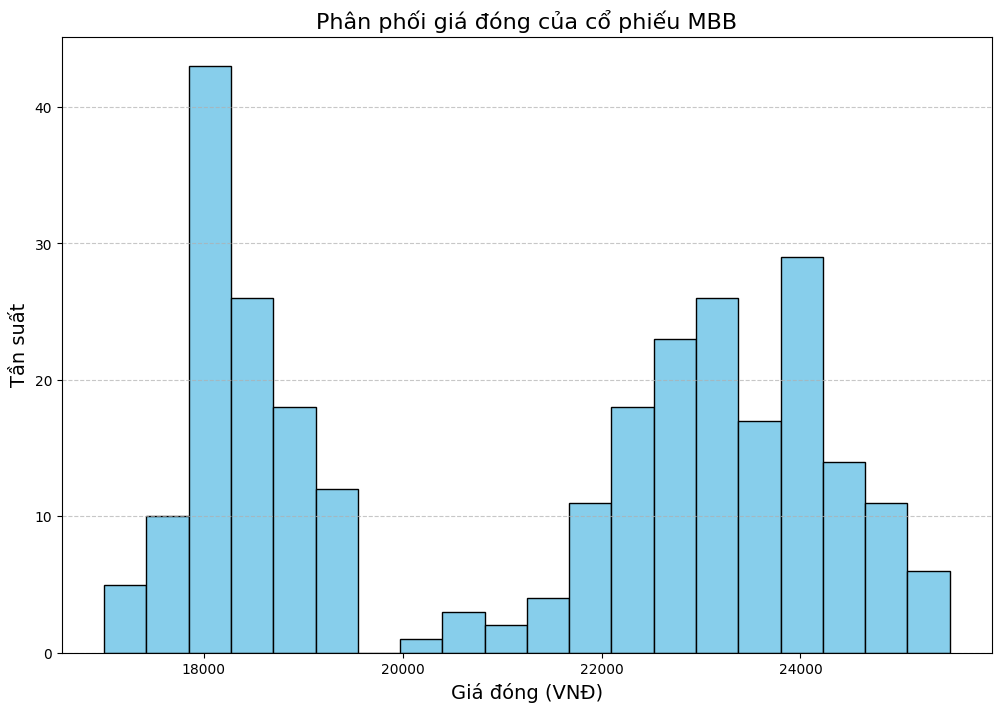

In [11]:
mbb_data = vn30["Close"]["MBB.VN"]

plt.figure(figsize=(12, 8))
plt.hist(mbb_data, bins=20, color="skyblue", edgecolor="black")
plt.title("Phân phối giá đóng của cổ phiếu MBB", fontsize=16)
plt.xlabel("Giá đóng (VNĐ)", fontsize=14)
plt.ylabel("Tần suất", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.ticklabel_format(style="plain", axis="y")  # Định dạng số đơn giản
plt.show()

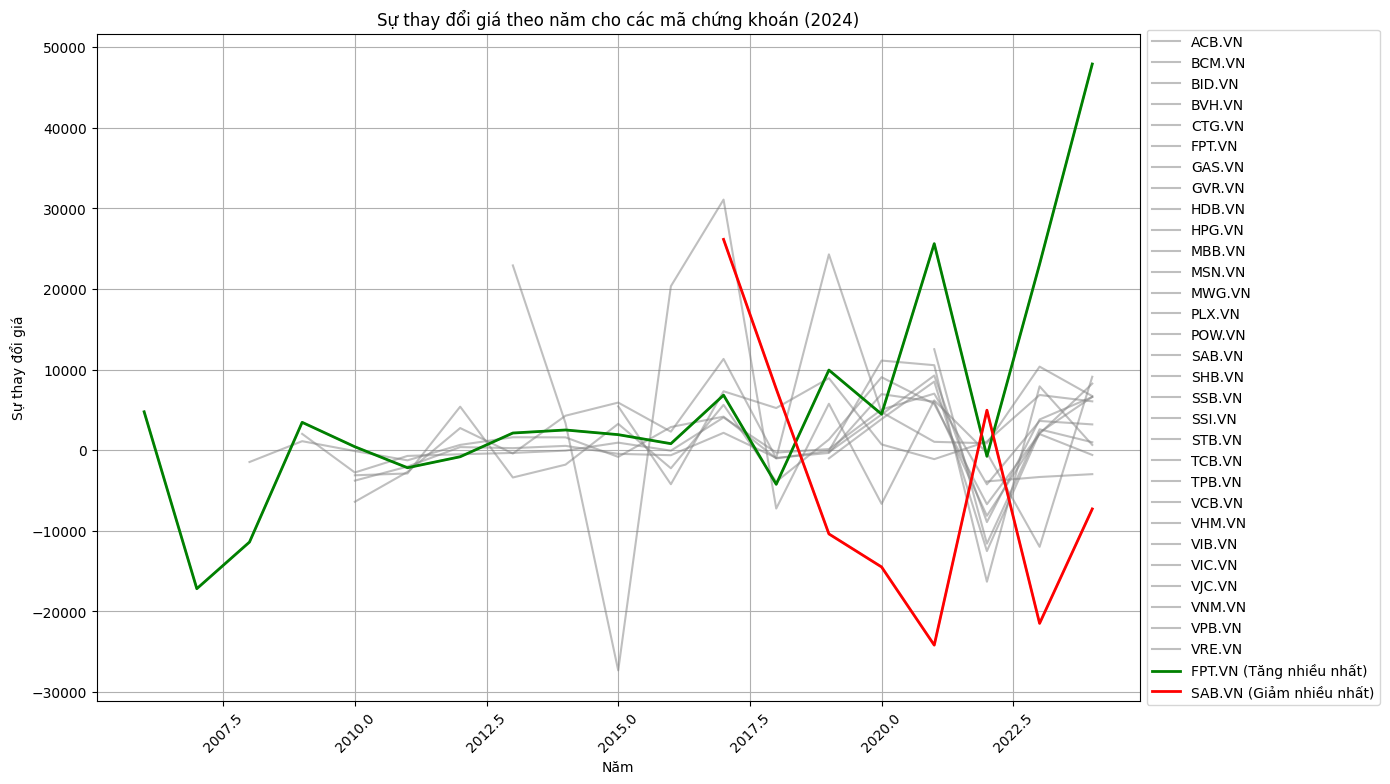

In [12]:
df = vn30

# Đảm bảo cột 'Date' đang ở định dạng datetime
df.index = pd.to_datetime(df.index)

# Lấy các cột liên quan đến giá (Giả sử có cột 'Close')
price_columns = [col for col in df.columns if col[0] == "Close"]

# Tạo dataframe chỉ chứa các cột Giá
price_df = df[price_columns].copy()
price_df.columns = price_df.columns.get_level_values(
    "Ticker"
)  # Chuyển đổi MultiIndex cột thành một chỉ mục đơn

# Thêm cột 'Year' vào dataframe
price_df["Year"] = price_df.index.year

# Tính sự thay đổi giá theo năm cho từng mã cổ phiếu
annual_change_df = price_df.groupby("Year").apply(lambda x: x.iloc[-1] - x.iloc[0], include_groups=False)

# Tìm mã cổ phiếu có sự thay đổi giá nhiều nhất và ít nhất trong năm gần nhất
latest_year = price_df["Year"].max()
latest_changes = annual_change_df.loc[latest_year]
top_increase = latest_changes.idxmax()
top_decrease = latest_changes.idxmin()

# Vẽ biểu đồ sự thay đổi giá cho năm gần nhất
plt.figure(figsize=(14, 8))
for ticker in annual_change_df.columns:
    plt.plot(
        annual_change_df.index,
        annual_change_df[ticker],
        label=ticker,
        color="grey",
        alpha=0.5,
    )

# Highlight the stocks with the highest increase and decrease
plt.plot(
    annual_change_df.index,
    annual_change_df[top_increase],
    label=f"{top_increase} (Tăng nhiều nhất)",
    color="green",
    linewidth=2,
)
plt.plot(
    annual_change_df.index,
    annual_change_df[top_decrease],
    label=f"{top_decrease} (Giảm nhiều nhất)",
    color="red",
    linewidth=2,
)

plt.title(f"Sự thay đổi giá theo năm cho các mã chứng khoán ({latest_year})")
plt.xlabel("Năm")
plt.ylabel("Sự thay đổi giá")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()